# Matplotlib의 다양한 플롯

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [2]:
# 런타임 다시 시작

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 

## 1. Bar Chart
- x 데이터가 카테고리 값인 경우

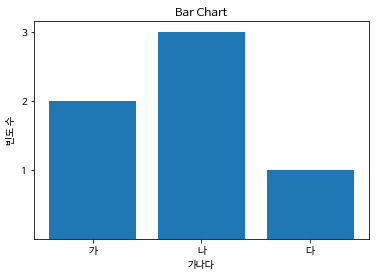

In [2]:
y = [2, 3, 1]
x = np.arange(len(y))
xlabel = ['가', '나', '다']
plt.title("Bar Chart")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()

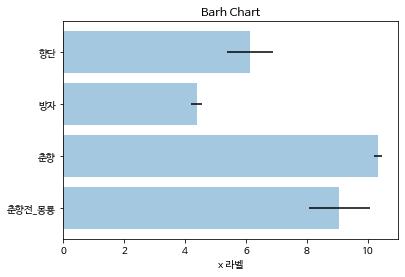

In [4]:
np.random.seed(2021)

people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title("Barh Chart")
plt.barh(y_pos, performance, xerr=error, alpha=0.4)
plt.yticks(y_pos, people)
plt.xlabel('x 라벨')
plt.show()

### 타이타닉 선실별 승객수

In [5]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [10]:
s = titanic['class'].value_counts()
s

Third     491
First     216
Second    184
Name: class, dtype: int64

In [7]:
df = titanic[['class','pclass']].groupby('class').count()
df

,pclass
class,
First,216
Second,184
Third,491


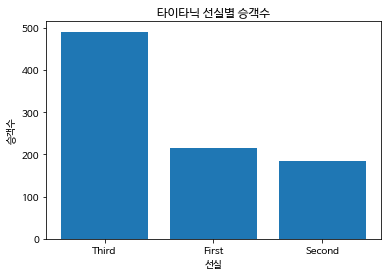

In [11]:
y = s.values
x = np.arange(len(y))
xlabel = s.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수')
plt.show()

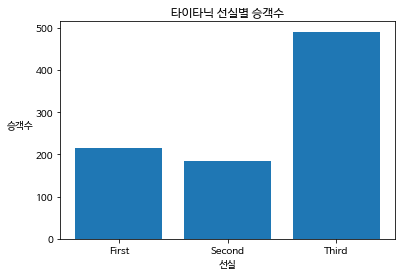

In [20]:
y = df.pclass.values
x = np.arange(len(y))
xlabel = df.index.to_list()

plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수', rotation=0, labelpad=15)
plt.show()

## 2. 파이 차트
- 카테고리 별 값의 상대적인 비교를 해야 할 때

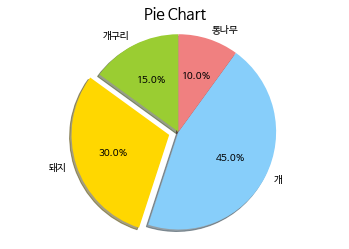

In [23]:
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]        # 합이 100이 되도록
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title("Pie Chart", fontsize=15)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 3. 히스토그램
- 데이터의 분포

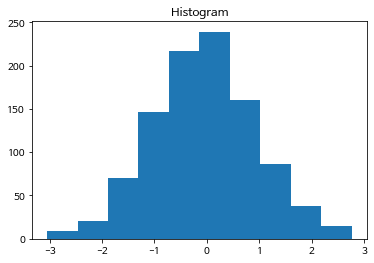

In [28]:
np.random.seed(0)
x = np.random.randn(1000)
plt.title("Histogram")
arrays, bins, _ = plt.hist(x, bins=10)
plt.show()

In [30]:
bins

array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
       -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
        2.75935511])

In [29]:
arrays

array([  9.,  20.,  70., 146., 217., 239., 160.,  86.,  38.,  15.])

## 4. 산점도(Scatter Plot)
- 두 개의 실수 데이터 집합의 상관관계를 살펴볼 때 사용

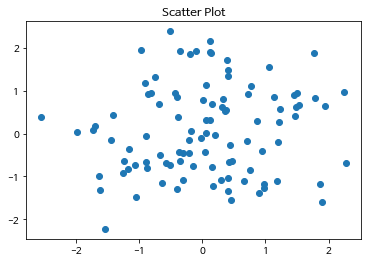

In [31]:
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.show()

### Anscombe's Quartet
- 선형회귀선: y = 3.0 + 0.5 * x

In [33]:
import seaborn as sns
ans = sns.load_dataset('anscombe')
ans.shape

(44, 3)

In [34]:
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [35]:
ans.groupby('dataset').describe()

x                           ...     y                          
        count mean       std  min  25%  ...   min    25%   50%   75%    max
dataset                                 ...                                
I        11.0  9.0  3.316625  4.0  6.5  ...  4.26  6.315  7.58  8.57  10.84
II       11.0  9.0  3.316625  4.0  6.5  ...  3.10  6.695  8.14  8.95   9.26
III      11.0  9.0  3.316625  4.0  6.5  ...  5.39  6.250  7.11  7.98  12.74
IV       11.0  9.0  3.316625  8.0  8.0  ...  5.25  6.170  7.04  8.19  12.50

[4 rows x 16 columns]

- Dataset I에 대해서 산점도와 회귀선 그리기

In [36]:
ds1 = ans[ans.dataset == 'I']
ds1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


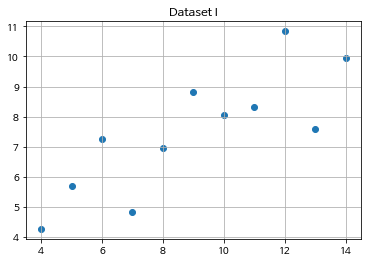

In [37]:
plt.scatter(ds1.x, ds1.y)
plt.grid()
plt.title('Dataset I')
plt.show()

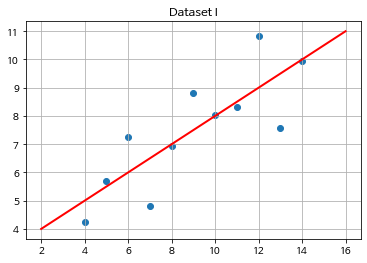

In [39]:
plt.scatter(ds1.x, ds1.y)
plt.plot([2,16], [4,11], c='r', lw=2)
plt.grid()
plt.title('Dataset I')
plt.show()

- 4개의 데이터셋 모두에 대해서 그림

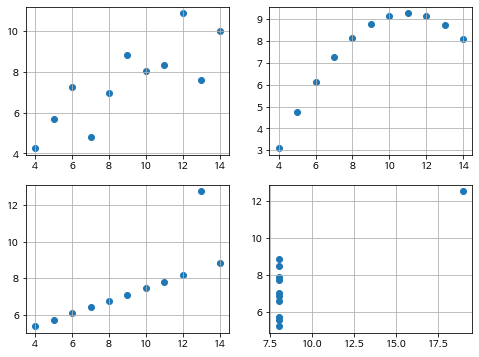

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))

for i, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i//2, i%2]
    ax.scatter(ds.x, ds.y)
    ax.grid()

plt.show()

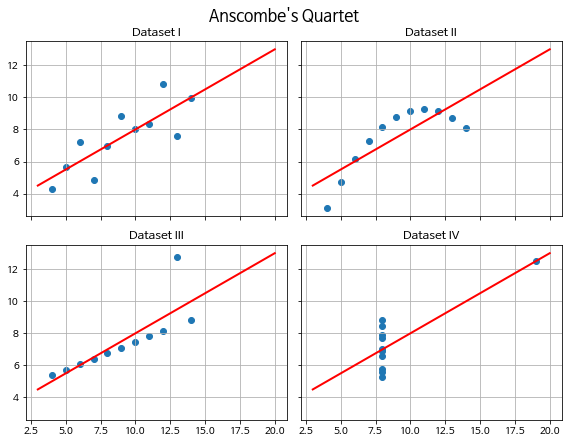

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(8,6),
                         sharex=True, sharey=True)

for i, roman in enumerate(['I','II','III','IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i//2, i%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([3,20], [4.5,13], 'r-', lw=2)   # y = 0.5 * x + 3
    ax.set_title(f'Dataset {roman}')
    ax.grid()

fig.suptitle("Anscombe's Quartet", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 5. Imshow
- 이미지 데이터

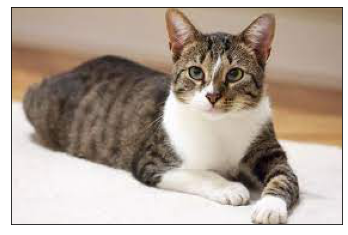

In [50]:
import matplotlib.image as img      # PIL, OpenCV(cv2)

image = img.imread('cat.jfif')
plt.imshow(image)
plt.xticks([]); plt.yticks([])
plt.show()

In [51]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
X

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [53]:
digits.images.shape

(1797, 8, 8)

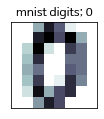

In [54]:
plt.title("mnist digits; 0")
plt.imshow(X, interpolation='nearest', cmap=plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left=0.35, right=0.65, bottom=0.35, top=0.65)
plt.show()

## 6. Box Plot

In [55]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Setosa 품종의 각 feature별 박스 플롯

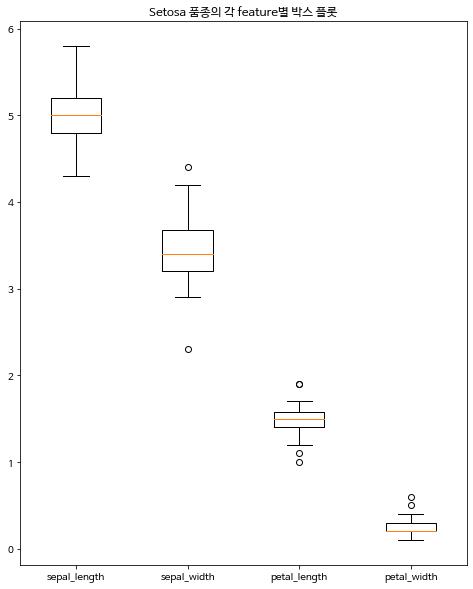

In [59]:
setosa = iris[iris.species == 'setosa']
plt.figure(figsize=(8,10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width,
             setosa.petal_length, setosa.petal_width],
            labels=['sepal_length','sepal_width','petal_length','petal_width'])
plt.title('Setosa 품종의 각 feature별 박스 플롯')
plt.show()

- 모든 품종의 피쳐별 박스 플롯

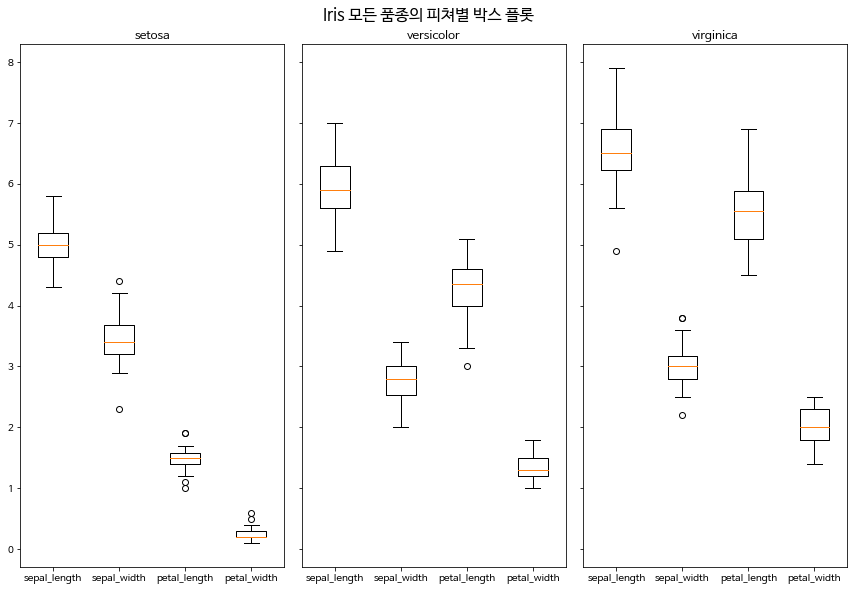

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(12,8), sharey=True)

for i, species in enumerate(iris.species.unique()):
    sub = iris[iris.species == species]
    ax = axes[i]
    ax.boxplot([sub.sepal_length, sub.sepal_width, sub.petal_length, sub.petal_width],
               labels=['sepal_length','sepal_width','petal_length','petal_width'])
    ax.set_title(species)

fig.suptitle("Iris 모든 품종의 피쳐별 박스 플롯", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()